Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

The key features of the wine quality data set:
alcohol
sulphates
density
citric acid
fixed acidity
volatile acidity

alcohol and wine quality are 48% positively correlated means as alcohol quantity increases wine quality also increases.

sulphates and wine quality are 25% positively correlated means as sulphates quantity increases wine quality also increases.

density and wine quality are 18% negatively correlated means as density increases wine quality gradually decreases.

citric acid and wine quality are 23% positively correlated means as citric acid increases wine quality gradually increases.

fixed acidity and wine quality are 12% positively correlated means as fixed acidity increases wine quality gradually increases.

volatile acidity and wine quality are 40% negatively correlated means as volatile acidity increases wine quality decreases. 

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

There are no missing values data in the wine quality data set observed during the feature engineering process.

If at all there are missing values we can impute with mean/median if it is a numeric data column and if it is categorical data columns we can impute with mode of the column.

Mean imputation is one of the simplest and most widely used methods to replace missing data with the mean value of the available data. It has the advantage of preserving the overall mean and being easy to implement and interpret. However, a big disadvantage of this one is the lowering of variance. The variance of the imputed dataset has a significantly lower variance.

Median imputation is particularly helpful when we have a large dataset with a small percentage of missing values. It is also useful when the missing values are missing at random. Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean. It does not take into account the precise value of each observation and hence does not use all information available in the data.

Yet another technique is mode imputation which is used in case of categorical values in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values. However, mode imputation also has some drawbacks, such as reducing the variance and standard deviation of the data, ignoring the distribution and correlation of the data, and potentially creating unrealistic values.

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

key factors that affect students' performance in exams are:

math score and reading score,

Female student tend to perform well than male students(students gender)

Standard Lunch help students perform well in exams(lunch type for students is also a major factor affecting students performance) 

Parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam (parents education for a male child is also an importatnt factor for students performance)

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female (students belonging to a particular group also is a factor affecting students performance)

we can visualize using histogram plot to check the distribution of female and male students based on their lunch,parental level of education.

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Process of feature engineering Data Checks to perform:

Checking missing values- to check if there are any missing values in any colum 

Check Duplicates- to check if there are duplicate values in the dataset

Check the number of unique values of each column

Checking the statistics of data set

segregating numerical and categorical features

Check various categories present in the different categorical column in the context of the student performance data set:

For numerical features aggregating the total score with mean - addition of math,reading and writing score and also finding the average of math,reading and writing score

Explore Visualizations using histogram plot of average score with gender, average score of each gender with lunch type, 
average score of each gender with parental level of education,average score of each gender with race ethnicity

For categorical columns like race ethnicity,parental_level_of_education and lunch varaibles we can try one hot encoding.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv(r"D:\Data Science Masters Impact Batch 2.0\winequality-red.csv")

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


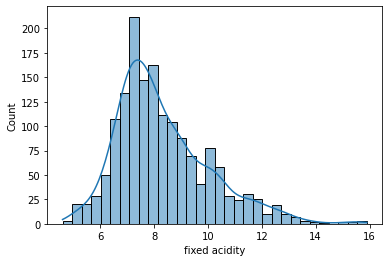

In [10]:
sns.histplot(df["fixed acidity"],kde=True)

fixed acidity shows a normal distribution

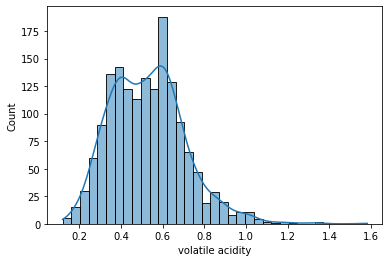

In [11]:
sns.histplot(df["volatile acidity"],kde=True)

volatile acidity shows a normal distribution

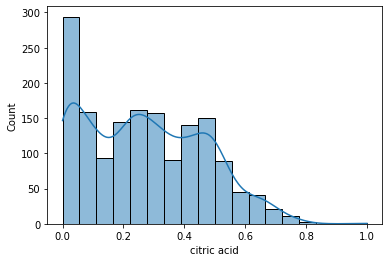

In [13]:
sns.histplot(df["citric acid"],kde=True)

citric acid shows non-normal distribution, we can use log normal transformation to improve normality.

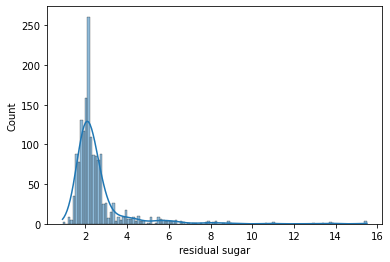

In [15]:
sns.histplot(df["residual sugar"],kde=True)

residual sugar shows left skewed distribution, we can use log normal transformation to improve normality.

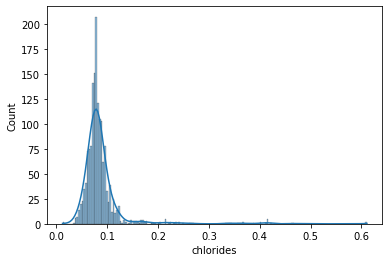

In [17]:
sns.histplot(df["chlorides"],kde=True)

chlorides shows a normal distribution

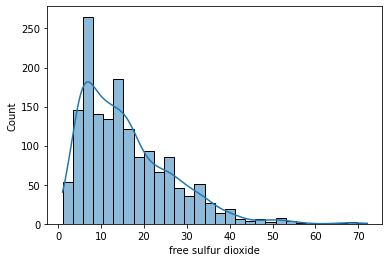

In [19]:
sns.histplot(df["free sulfur dioxide"],kde=True)

free sulfur dioxide shows a right skewed distribution, and we can use log normal transformation to make it normal 

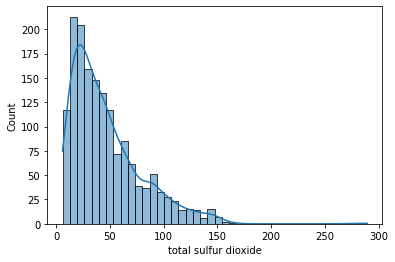

In [20]:
sns.histplot(df["total sulfur dioxide"],kde=True)

total sulfur dioxide shows a right skewed distribution, and we can use log normal transformation to make it normal.

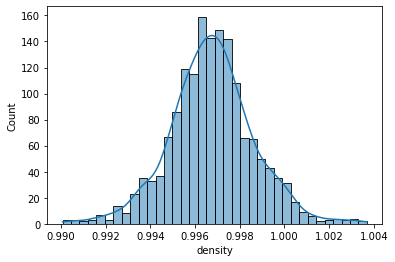

In [22]:
sns.histplot(df["density"],kde=True)

density shows a normal distribution so no transformation required

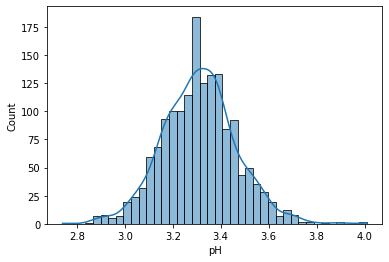

In [24]:
sns.histplot(df["pH"],kde=True)

pH shows a normal distribution so no transformation required

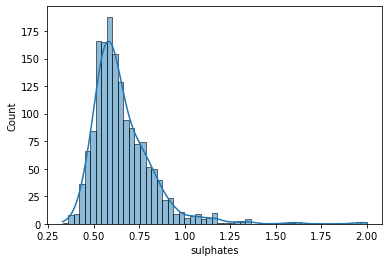

In [26]:
sns.histplot(df["sulphates"],kde=True)

suphates shows a normal distribution so no transformation required

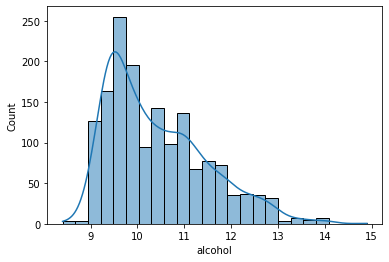

In [28]:
sns.histplot(df["alcohol"],kde=True)

alcohol shows a right skewed distribution, and we can use log normal transformation to make it normal.

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv(r"D:\Data Science Masters Impact Batch 2.0\winequality-red.csv")

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
df.drop('quality', axis =1, inplace=True)

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [41]:
scaler =StandardScaler()
 
features =scaler.fit(df)
features =features.transform(df)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777


In [43]:
X=scaled_df.values

In [50]:
#using PCA to reduce the no. of features to 2
pca=PCA(n_components=7)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043


In [55]:
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance
# (iii.) Print explained variance as plain text
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(20))
print('-'*40)

PCA Overview
Total: 7 components
----------------------------------------
Mean explained variance: 0.13
----------------------------------------
   explained variance  cumulative
1            0.281739    0.281739
2            0.175083    0.456822
3            0.140958    0.597781
4            0.110294    0.708074
5            0.087208    0.795283
6            0.059964    0.855247
7            0.053072    0.908319
----------------------------------------


The minimum number of principal components required to explain 90% of the variance in the data is 7 (total 7 components are required to explain 90% of the variance in the data)